# BlackBelt Consulting

## 1. Benson Project

### 1.1 Data Collection

In [1]:
import pandas as pd
import datetime

In [2]:
numdays = 260  # setting the number of days we want to take back 1 week from 06-29
# We want data for this year (1st semester) and the last quarter of 2018 (so we can analyze the holiday's season)

In [3]:
date_time_str = '2019-06-22 08:15:27.243860'  # penultimate date of the range in the MTA website
date_time_obj = datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')  
# transforming it to a date_time object
date_time_obj

datetime.datetime(2019, 6, 22, 8, 15, 27, 243860)

In [4]:
date_list = [date_time_obj - datetime.timedelta(days=x) for x in range(0, numdays, 7)]
# creating a list of dates that starts on the penultimate date and goes back the numdays we've set 
# (jumping 7 days each time)
date_list

[datetime.datetime(2019, 6, 22, 8, 15, 27, 243860),
 datetime.datetime(2019, 6, 15, 8, 15, 27, 243860),
 datetime.datetime(2019, 6, 8, 8, 15, 27, 243860),
 datetime.datetime(2019, 6, 1, 8, 15, 27, 243860),
 datetime.datetime(2019, 5, 25, 8, 15, 27, 243860),
 datetime.datetime(2019, 5, 18, 8, 15, 27, 243860),
 datetime.datetime(2019, 5, 11, 8, 15, 27, 243860),
 datetime.datetime(2019, 5, 4, 8, 15, 27, 243860),
 datetime.datetime(2019, 4, 27, 8, 15, 27, 243860),
 datetime.datetime(2019, 4, 20, 8, 15, 27, 243860),
 datetime.datetime(2019, 4, 13, 8, 15, 27, 243860),
 datetime.datetime(2019, 4, 6, 8, 15, 27, 243860),
 datetime.datetime(2019, 3, 30, 8, 15, 27, 243860),
 datetime.datetime(2019, 3, 23, 8, 15, 27, 243860),
 datetime.datetime(2019, 3, 16, 8, 15, 27, 243860),
 datetime.datetime(2019, 3, 9, 8, 15, 27, 243860),
 datetime.datetime(2019, 3, 2, 8, 15, 27, 243860),
 datetime.datetime(2019, 2, 23, 8, 15, 27, 243860),
 datetime.datetime(2019, 2, 16, 8, 15, 27, 243860),
 datetime.datetime

In [5]:
# transforming the dates into strings and putting in a list:

url_dates = []

for i in date_list:
    year = str(i.year).replace("20", "")
    day = str(i.day)
    if i.day < 10:
        day = "0" + day
    month = str(i.month)
    if i.month < 10:
        month = "0" + month
    date_str = year + month + day
    url_dates.append(date_str)

In [6]:
# starting the dataframe with the last available date, which is june 29, 19:
df = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_190629.txt")
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,00:00:00,REGULAR,7107725,2407457
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,04:00:00,REGULAR,7107738,2407465
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,08:00:00,REGULAR,7107761,2407491
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,12:00:00,REGULAR,7107858,2407541
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,16:00:00,REGULAR,7108075,2407581


In [7]:
# concatenating each new date to the original dataframe:
for url in url_dates:
    df2 = pd.read_csv(
        "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt".format(url))
    df = pd.concat([df, df2], ignore_index=True)

In [8]:
df.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
7902892,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/05/2018,05:00:00,REGULAR,5554,360
7902893,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/05/2018,09:00:00,REGULAR,5554,360
7902894,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/05/2018,13:00:00,REGULAR,5554,360
7902895,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/05/2018,17:00:00,REGULAR,5554,360
7902896,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/05/2018,21:00:00,REGULAR,5554,360


In [10]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7902897 entries, 0 to 7902896
Data columns (total 11 columns):
C/A                                                                     7902897 non-null object
UNIT                                                                    7902897 non-null object
SCP                                                                     7902897 non-null object
STATION                                                                 7902897 non-null object
LINENAME                                                                7902897 non-null object
DIVISION                                                                7902897 non-null object
DATE                                                                    7902897 non-null object
TIME                                                                    7902897 non-null object
DESC                                                                    7902897 non-null object
ENTRIES                

### Data Treatment

In [11]:
# First, let's transform the date and time columns into one column as a datetime object:
df["DATE_TIME"] = pd.to_datetime(df.DATE + " " + df.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7902897 entries, 0 to 7902896
Data columns (total 12 columns):
C/A                                                                     object
UNIT                                                                    object
SCP                                                                     object
STATION                                                                 object
LINENAME                                                                object
DIVISION                                                                object
DATE                                                                    object
TIME                                                                    object
DESC                                                                    object
ENTRIES                                                                 int64
EXITS                                                                   int64
DATE_TIME           

In [13]:
# Since we want only the last quarter of 2018, let's remove the rows containing 2 september dates (29 and 30):
sep = (df["DATE"] == '09/29/2018') | (df["DATE"] == '09/30/2018')
df.drop(df[sep].index, inplace=True)

In [14]:
sorted(df["DATE"].unique())
# no more september dates

['01/01/2019',
 '01/02/2019',
 '01/03/2019',
 '01/04/2019',
 '01/05/2019',
 '01/06/2019',
 '01/07/2019',
 '01/08/2019',
 '01/09/2019',
 '01/10/2019',
 '01/11/2019',
 '01/12/2019',
 '01/13/2019',
 '01/14/2019',
 '01/15/2019',
 '01/16/2019',
 '01/17/2019',
 '01/18/2019',
 '01/19/2019',
 '01/20/2019',
 '01/21/2019',
 '01/22/2019',
 '01/23/2019',
 '01/24/2019',
 '01/25/2019',
 '01/26/2019',
 '01/27/2019',
 '01/28/2019',
 '01/29/2019',
 '01/30/2019',
 '01/31/2019',
 '02/01/2019',
 '02/02/2019',
 '02/03/2019',
 '02/04/2019',
 '02/05/2019',
 '02/06/2019',
 '02/07/2019',
 '02/08/2019',
 '02/09/2019',
 '02/10/2019',
 '02/11/2019',
 '02/12/2019',
 '02/13/2019',
 '02/14/2019',
 '02/15/2019',
 '02/16/2019',
 '02/17/2019',
 '02/18/2019',
 '02/19/2019',
 '02/20/2019',
 '02/21/2019',
 '02/22/2019',
 '02/23/2019',
 '02/24/2019',
 '02/25/2019',
 '02/26/2019',
 '02/27/2019',
 '02/28/2019',
 '03/01/2019',
 '03/02/2019',
 '03/03/2019',
 '03/04/2019',
 '03/05/2019',
 '03/06/2019',
 '03/07/2019',
 '03/08/20

In [15]:
df.columns = [column.strip() for column in df.columns]

In [16]:
df["TURNSTILE_ID"] = df["C/A"] + " " + df["UNIT"] + " " + df["SCP"] + " " + df["STATION"]

In [17]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,TURNSTILE_ID
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,00:00:00,REGULAR,7107725,2407457,2019-06-22 00:00:00,A002 R051 02-00-00 59 ST
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,04:00:00,REGULAR,7107738,2407465,2019-06-22 04:00:00,A002 R051 02-00-00 59 ST
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,08:00:00,REGULAR,7107761,2407491,2019-06-22 08:00:00,A002 R051 02-00-00 59 ST
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,12:00:00,REGULAR,7107858,2407541,2019-06-22 12:00:00,A002 R051 02-00-00 59 ST
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,16:00:00,REGULAR,7108075,2407581,2019-06-22 16:00:00,A002 R051 02-00-00 59 ST


In [18]:
# Checking if there are readings that are duplicates
(df
 .groupby(["TURNSTILE_ID", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(50)

,TURNSTILE_ID,DATE_TIME,ENTRIES
2596105,N135 R385 01-03-01 ROCKAWAY BLVD,2019-03-31 13:00:00,2
3832012,N519 R461 00-03-01 B'WAY-LAFAYETTE,2019-03-25 21:00:00,2
3059621,N311 R339 01-06-00 36 ST,2018-12-09 16:00:00,2
3059622,N311 R339 01-06-00 36 ST,2018-12-09 20:00:00,2
3059623,N311 R339 01-06-00 36 ST,2018-12-10 00:00:00,2
3057994,N311 R339 01-00-02 36 ST,2018-12-09 16:00:00,2
6410720,R283 R221 00-00-02 167 ST,2019-04-16 04:00:00,2
3057995,N311 R339 01-00-02 36 ST,2018-12-09 20:00:00,2
1849060,N045 R187 01-06-00 81 ST-MUSEUM,2019-06-11 21:00:00,2
6410717,R283 R221 00-00-02 167 ST,2019-04-15 16:00:00,2


In [19]:
# On some days, we seem to have two entries for same time.  Let's take a look at a couple of examples:
mask = ((df["TURNSTILE_ID"] == "N071 R013 00-00-00 34 ST-PENN STA") &
(df["DATE_TIME"].dt.date == datetime.datetime(2019, 2, 27).date()))

df[mask]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,TURNSTILE_ID
3530925,N071,R013,00-00-00,34 ST-PENN STA,ACE,IND,02/27/2019,03:00:00,REGULAR,5869431,16519942,2019-02-27 03:00:00,N071 R013 00-00-00 34 ST-PENN STA
3530926,N071,R013,00-00-00,34 ST-PENN STA,ACE,IND,02/27/2019,07:00:00,REGULAR,5869444,16520153,2019-02-27 07:00:00,N071 R013 00-00-00 34 ST-PENN STA
3530927,N071,R013,00-00-00,34 ST-PENN STA,ACE,IND,02/27/2019,11:00:00,REGULAR,5869635,16521165,2019-02-27 11:00:00,N071 R013 00-00-00 34 ST-PENN STA
3530928,N071,R013,00-00-00,34 ST-PENN STA,ACE,IND,02/27/2019,15:00:00,REGULAR,5869852,16521721,2019-02-27 15:00:00,N071 R013 00-00-00 34 ST-PENN STA
3530929,N071,R013,00-00-00,34 ST-PENN STA,ACE,IND,02/27/2019,19:00:00,REGULAR,2196639,2588468,2019-02-27 19:00:00,N071 R013 00-00-00 34 ST-PENN STA
3530930,N071,R013,00-00-00,34 ST-PENN STA,ACE,IND,02/27/2019,19:00:00,RECOVR AUD,5870225,16522419,2019-02-27 19:00:00,N071 R013 00-00-00 34 ST-PENN STA
3530931,N071,R013,00-00-00,34 ST-PENN STA,ACE,IND,02/27/2019,23:00:00,REGULAR,2196693,2588648,2019-02-27 23:00:00,N071 R013 00-00-00 34 ST-PENN STA
3530932,N071,R013,00-00-00,34 ST-PENN STA,ACE,IND,02/27/2019,23:00:00,RECOVR AUD,5870426,16522677,2019-02-27 23:00:00,N071 R013 00-00-00 34 ST-PENN STA


On this case, the RECOVR AUD seems to be the correct one since the entries and exits values are similar to the other readings.

In [20]:
# Other example:
mask = ((df["TURNSTILE_ID"] == "R205A R014 04-02-01 FULTON ST") &
(df["DATE_TIME"].dt.date == datetime.datetime(2018, 10, 21).date()))

df[mask]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,TURNSTILE_ID
7253466,R205A,R014,04-02-01,FULTON ST,2345ACJZ,IRT,10/21/2018,01:00:00,REGULAR,2244820,489731,2018-10-21 01:00:00,R205A R014 04-02-01 FULTON ST
7253467,R205A,R014,04-02-01,FULTON ST,2345ACJZ,IRT,10/21/2018,01:00:00,RECOVR AUD,2244820,10647811,2018-10-21 01:00:00,R205A R014 04-02-01 FULTON ST
7253468,R205A,R014,04-02-01,FULTON ST,2345ACJZ,IRT,10/21/2018,05:00:00,REGULAR,2244820,489731,2018-10-21 05:00:00,R205A R014 04-02-01 FULTON ST
7253469,R205A,R014,04-02-01,FULTON ST,2345ACJZ,IRT,10/21/2018,09:00:00,REGULAR,2244820,489731,2018-10-21 09:00:00,R205A R014 04-02-01 FULTON ST
7253470,R205A,R014,04-02-01,FULTON ST,2345ACJZ,IRT,10/21/2018,13:00:00,REGULAR,2244820,489731,2018-10-21 13:00:00,R205A R014 04-02-01 FULTON ST
7253471,R205A,R014,04-02-01,FULTON ST,2345ACJZ,IRT,10/21/2018,17:00:00,REGULAR,2244820,489731,2018-10-21 17:00:00,R205A R014 04-02-01 FULTON ST
7253472,R205A,R014,04-02-01,FULTON ST,2345ACJZ,IRT,10/21/2018,21:00:00,REGULAR,2244820,489731,2018-10-21 21:00:00,R205A R014 04-02-01 FULTON ST


On the other hand, in this case, the RECOVR AUD seems to be the wrong one (exits are much larger than the regular exits).

In [21]:
# Since we can't map every one of these ocurrencies, we will remove all the duplicates and try to deal with the 
# aparent register errors in another way:
df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [22]:
# No duplicate problems anymore:
(df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(15)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2018-10-01 00:00:00,1
5230957,R141,R031,00-03-01,34 ST-PENN STA,2019-01-05 03:00:00,1
5230969,R141,R031,00-03-01,34 ST-PENN STA,2019-01-07 03:00:00,1
5230968,R141,R031,00-03-01,34 ST-PENN STA,2019-01-06 23:00:00,1
5230967,R141,R031,00-03-01,34 ST-PENN STA,2019-01-06 19:00:00,1
5230966,R141,R031,00-03-01,34 ST-PENN STA,2019-01-06 15:00:00,1
5230965,R141,R031,00-03-01,34 ST-PENN STA,2019-01-06 11:00:00,1
5230964,R141,R031,00-03-01,34 ST-PENN STA,2019-01-06 07:00:00,1
5230963,R141,R031,00-03-01,34 ST-PENN STA,2019-01-06 03:00:00,1
5230962,R141,R031,00-03-01,34 ST-PENN STA,2019-01-05 23:00:00,1


In [23]:
df.describe()

,ENTRIES,EXITS
count,7.846444e+06,7.846444e+06
mean,4.042695e+07,3.337117e+07
std,2.079670e+08,1.931105e+08
min,0.000000e+00,0.000000e+00
25%,4.219170e+05,1.744830e+05
50%,2.319998e+06,1.334097e+06
75%,6.850807e+06,4.733665e+06
max,2.129711e+09,2.124342e+09


For our data we are aiming only in the entries since we believe this is a better approach to gauge the number of people that may be focusing on the ads. 

We can see from the table above that the average of cumulative exits is much lower than the entries. This probably happens because many people don't use the turnstiles to exit a station.

Also, people entering the stations are more likely to spend more time inside it than people exiting the station (waiting for the subway to arrive) and therefore, more chances to see the digital banners.

In [24]:
# Conclusion: Drop Exits and Desc Column.  To prevent errors in multiple run of cell, errors on drop is ignored
df = df.drop(["EXITS", "DESC"], axis=1, errors="ignore")

In [25]:
df.reset_index(drop=True)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME,TURNSTILE_ID
0,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/28/2019,21:00:00,5554,2019-06-28 21:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT
1,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/28/2019,17:00:00,5554,2019-06-28 17:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT
2,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/28/2019,13:00:00,5554,2019-06-28 13:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT
3,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/28/2019,09:00:00,5554,2019-06-28 09:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT
4,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/28/2019,05:00:00,5554,2019-06-28 05:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT
5,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/28/2019,01:00:00,5554,2019-06-28 01:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT
6,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/27/2019,21:00:00,5554,2019-06-27 21:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT
7,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/27/2019,17:00:00,5554,2019-06-27 17:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT
8,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/27/2019,13:00:00,5554,2019-06-27 13:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT
9,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/27/2019,09:00:00,5554,2019-06-27 09:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT


In [26]:
# There seems to be a problem with 23rd st station (and others) because different stations are named the same way:
df[df["STATION"] == "23 ST"].groupby(["LINENAME"]).mean()

,ENTRIES
LINENAME,
1,5.021581e+06
6,1.079352e+08
CE,2.076075e+07
FM,2.512153e+08
NRW,1.123279e+07


Let's try to solve this by changing only the name of the most important problematic stations (the ones that probably have a high foot traffic and may mess up our results) into "station + line".

We'll do this for:
- 23 st
- 86 st
- 96 st
- 14 st
- 125 st


In [ ]:
# # Since we want only the last quarter of 2018, let's remove the rows containing 2 september dates (29 and 30):
# sep = (df["DATE"] == '09/29/2018') | (df["DATE"] == '09/30/2018')
# df.drop(df[sep].index, inplace=True)

In [27]:
# Let's create a new dataframe with only the problematic stations and remove them from the original df.
prob = ((df["STATION"] == '14 ST') |
(df["STATION"] == '23 ST') | 
(df["STATION"] == '86 ST') |
(df["STATION"] == '96 ST') |
(df["STATION"] == '125 ST'))
df_prob = df[prob]

In [28]:
df.drop(df[prob].index, inplace=True)
df["STATION"].unique()

array(['RIT-ROOSEVELT', 'RIT-MANHATTAN', 'TOMPKINSVILLE', 'ST. GEORGE',
       'EASTCHSTER/DYRE', 'BAYCHESTER AV', 'GUN HILL RD', 'PELHAM PKWY',
       'MORRIS PARK', 'FLATBUSH AV-B.C', 'NEWKIRK AV', 'BEVERLY RD',
       'CHURCH AV', 'WINTHROP ST', 'STERLING ST', 'PRESIDENT ST',
       'NEW LOTS AV', 'VAN SICLEN AV', 'PENNSYLVANIA AV', 'JUNIUS ST',
       'ROCKAWAY AV', 'SARATOGA AV', 'SUTTER AV-RUTLD', 'CROWN HTS-UTICA',
       'KINGSTON AV', 'NOSTRAND AV', 'FRANKLIN AV', 'EASTN PKWY-MUSM',
       'GRAND ARMY PLAZ', 'BERGEN ST', 'ATL AV-BARCLAY', 'NEVINS ST',
       'HOYT ST', 'BOROUGH HALL', 'CLARK ST', '34 ST-HUDSON YD',
       'FLUSHING-MAIN', 'METS-WILLETS PT', '111 ST', '103 ST-CORONA',
       'JUNCTION BLVD', '90 ST-ELMHURST', '82 ST-JACKSON H',
       '74 ST-BROADWAY', '69 ST', '61 ST WOODSIDE', '52 ST',
       '46 ST BLISS ST', '40 ST LOWERY ST', '33 ST-RAWSON ST',
       'ASTORIA DITMARS', 'ASTORIA BLVD', '30 AV', 'BROADWAY', '36 AV',
       '39 AV', 'QUEENSBORO PLZ', 'COURT 

In [29]:
# For this new df, let's change the STATION to STATION + LINENAME:

df_prob["STATION"] = df_prob["STATION"] + " " + df_prob["LINENAME"]
df_prob.head()

/Users/liviasalgueiro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME,TURNSTILE_ID
171875,R305,R206,01-00-02,125 ST 23,23,IRT,06/28/2019,21:00:00,245172960,2019-06-28 21:00:00,R305 R206 01-00-02 125 ST
171874,R305,R206,01-00-02,125 ST 23,23,IRT,06/28/2019,17:00:00,245172563,2019-06-28 17:00:00,R305 R206 01-00-02 125 ST
171873,R305,R206,01-00-02,125 ST 23,23,IRT,06/28/2019,13:00:00,245172050,2019-06-28 13:00:00,R305 R206 01-00-02 125 ST
171872,R305,R206,01-00-02,125 ST 23,23,IRT,06/28/2019,09:00:00,245171827,2019-06-28 09:00:00,R305 R206 01-00-02 125 ST
171871,R305,R206,01-00-02,125 ST 23,23,IRT,06/28/2019,05:00:00,245171667,2019-06-28 05:00:00,R305 R206 01-00-02 125 ST


In [30]:
# Now, let's concatenate this modified df into our original df to bring these stations back:
df = pd.concat([df, df_prob], ignore_index=True)

In [36]:
sorted(df["STATION"].unique())

['1 AV',
 '103 ST',
 '103 ST-CORONA',
 '104 ST',
 '110 ST',
 '111 ST',
 '116 ST',
 '116 ST-COLUMBIA',
 '121 ST',
 '125 ST 1',
 '125 ST 23',
 '125 ST 456',
 '125 ST ACBD',
 '135 ST',
 '137 ST CITY COL',
 '138/GRAND CONC',
 '14 ST 123FLM',
 '14 ST ACEL',
 '14 ST FLM123',
 '14 ST-UNION SQ',
 '145 ST',
 '149/GRAND CONC',
 '14TH STREET',
 '15 ST-PROSPECT',
 '155 ST',
 '157 ST',
 '161/YANKEE STAD',
 '163 ST-AMSTERDM',
 '167 ST',
 '168 ST',
 '169 ST',
 '170 ST',
 '174 ST',
 '174-175 STS',
 '175 ST',
 '176 ST',
 '18 AV',
 '18 ST',
 '181 ST',
 '182-183 STS',
 '183 ST',
 '190 ST',
 '191 ST',
 '2 AV',
 '20 AV',
 '207 ST',
 '21 ST',
 '21 ST-QNSBRIDGE',
 '215 ST',
 '219 ST',
 '225 ST',
 '23 ST 1',
 '23 ST 6',
 '23 ST CE',
 '23 ST FM',
 '23 ST NRW',
 '231 ST',
 '233 ST',
 '238 ST',
 '25 AV',
 '25 ST',
 '28 ST',
 '3 AV',
 '3 AV 138 ST',
 '3 AV-149 ST',
 '30 AV',
 '33 ST',
 '33 ST-RAWSON ST',
 '34 ST-HERALD SQ',
 '34 ST-HUDSON YD',
 '34 ST-PENN STA',
 '36 AV',
 '36 ST',
 '39 AV',
 '4 AV-9 ST',
 '40 ST

Now, let's try to calculate the number of real entries in each period of time, since the original data only shows the cumulative entries registered up to that time:


In [40]:
df = df.groupby(["STATION","TURNSTILE_ID", "LINENAME", "DATE", "TIME", "DATE_TIME"],as_index=False).ENTRIES.sum()

In [41]:
df[["PREV_DATETIME", "PREV_ENTRIES"]] = (df
                                                       .groupby(["STATION", "TURNSTILE_ID", "LINENAME"])["DATE_TIME", "ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))  

In [43]:
df.head(10)

,STATION,TURNSTILE_ID,LINENAME,DATE,TIME,DATE_TIME,ENTRIES,PREV_DATETIME,PREV_ENTRIES
0,1 AV,H007 R248 00-00-00 1 AV,L,01/01/2019,03:00:00,2019-01-01 03:00:00,14276525,NaT,NaN
1,1 AV,H007 R248 00-00-00 1 AV,L,01/01/2019,07:00:00,2019-01-01 07:00:00,14276565,2019-01-01 03:00:00,14276525.0
2,1 AV,H007 R248 00-00-00 1 AV,L,01/01/2019,11:00:00,2019-01-01 11:00:00,14276733,2019-01-01 07:00:00,14276565.0
3,1 AV,H007 R248 00-00-00 1 AV,L,01/01/2019,15:00:00,2019-01-01 15:00:00,14277178,2019-01-01 11:00:00,14276733.0
4,1 AV,H007 R248 00-00-00 1 AV,L,01/01/2019,19:00:00,2019-01-01 19:00:00,14277679,2019-01-01 15:00:00,14277178.0
5,1 AV,H007 R248 00-00-00 1 AV,L,01/01/2019,23:00:00,2019-01-01 23:00:00,14277982,2019-01-01 19:00:00,14277679.0
6,1 AV,H007 R248 00-00-00 1 AV,L,01/02/2019,03:00:00,2019-01-02 03:00:00,14278032,2019-01-01 23:00:00,14277982.0
7,1 AV,H007 R248 00-00-00 1 AV,L,01/02/2019,07:00:00,2019-01-02 07:00:00,14278106,2019-01-02 03:00:00,14278032.0
8,1 AV,H007 R248 00-00-00 1 AV,L,01/02/2019,11:00:00,2019-01-02 11:00:00,14279160,2019-01-02 07:00:00,14278106.0
9,1 AV,H007 R248 00-00-00 1 AV,L,01/02/2019,15:00:00,2019-01-02 15:00:00,14279791,2019-01-02 11:00:00,14279160.0


In [46]:
# Drop the rows for the earliest date_time in the df
df.dropna(subset=["PREV_DATETIME"], axis=0, inplace=True)

Another issue we found was the fact that the entries counters usually count up, eventually hit some number, and reset to 0. Also, sometimes they also count down as a reverse counter. To solve this, let's use the following function:


In [49]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 10k, then the counter might have been reset.
# 10k seems to be a reasonable number for maximum people entering in a period of hours.
# Just set it to zero as different counters have different cycle limits
df["REAL_ENTRIES"] = df.apply(get_daily_counts, axis=1, max_counter=10000)

13991546 14803646.0
59406619 60365873.0
370461567 370681694.0
2292573 2466148.0
6143858 6409687.0
230637 281044.0
2606898 2742207.0
303141 615955.0
954950085 955485322.0
146 1629651041.0
1629235275 407880.0
13692262 14214275.0
10463822 10830830.0
4829300 5017089.0
1416717 2099247.0
12948220 13465087.0
15909218 16478555.0
8037760 8347850.0
12213651 12628457.0
11011548 11516264.0
36258618 36977530.0
3790546 4424276.0
14195736 14802694.0
283045 664186.0
1535124 1894570.0
2097089095 8585853.0
25412483 2097051492.0
8343830 25517307.0
15222065 15661511.0
13999397 14403309.0
1940681 2364921.0
755794 1305489.0
4889470 5793308.0
11870367 12647834.0
10621084 11220187.0
3726496 4050060.0
4283996 4644952.0
5975367 6125521.0
1121224670 1121305577.0
2025952173 2025875710.0
4447938 4651612.0
98238 248929.0
616332 717006.0
2986689 3075490.0
12901 5605753.0
5599832 13162.0
1681209384 1681141487.0
4445741 4711600.0
5194163 5452810.0
5238262 5489956.0
3000951 3620813.0
4330655 4921823.0
13472235 14017816

2350584 2611457.0
2185260 2432349.0
6251109 1057513.0
459365 6301055.0
2759519 3054117.0
117186 324988.0
1984617 2156025.0
1961824 2165011.0
4837554 5231799.0
458754 5067.0
4753 458835.0
245728 361365.0
847471 1191847.0
2249373 2738673.0
10575750 11104035.0
22134068 22355016.0
22347133 22620069.0
19126028 19397181.0
2892275 3072296.0
2803918 2936313.0
153485 235818.0
1412813 1460209.0
80434 150253.0
1496283 1578967.0
647181 679723.0
1652472 1681049.0
699146 784065.0
503117 554377.0
19119 108204.0
4187260 4534331.0
1479828 1704332.0
7100586 7305802.0
2788402 3037094.0
436846 679515.0
386125 649178.0
250570 575607.0
134582410 476783.0
428630 134624581.0
201790861 201884403.0
4708676 5066376.0
6710722 6949273.0
3621419 3897046.0
50349452 198446.0
34745 50514827.0
839560726 381377.0
168 839608862.0
770512 1268582.0
6810731 7414565.0
1779736 1913738.0
1084243 1175229.0
1602981 1679233.0
426 12737464.0
12392762 228840.0
9864584 10272818.0
688960414 688660194.0
21661 206702.0
1676127 1786333.

7520 552543411.0
552542449 7738.0
6718661 473002.0
473020 6718661.0
6749425 473529.0
473562 6749425.0
466101 479280.0
15167158 2301300.0
2301368 15167158.0
15198190 2302645.0
2302715 15198190.0
2284185 2315452.0
4022941 1908426.0
1908578 4022941.0
4050583 1910943.0
1911046 4050583.0
1874514 1934813.0
3649635 74393.0
72 3693753.0
891097 495016.0
495038 891097.0
893162 495279.0
495298 893162.0
487498 520663.0
1333943 2888266.0
2888921 1333943.0
1350363 2899710.0
2900248 1350363.0
2741468 2998831.0
281586 4109107.0
4109981 281586.0
292530 4125278.0
4126050 292530.0
3911672 4275038.0
1437214 1648855.0
1650266 1437214.0
1447456 1673816.0
1675023 1447456.0
1322257 1926894.0
281714 2256545.0
2258702 281714.0
290287 2295351.0
2297285 290287.0
1840252 2683550.0
24276244 25316773.0
3594616 4703112.0
6212398 6198115.0
4661317 4636600.0
1988481 1955767.0
27635837 27593808.0
1255443642 1255491056.0
497147 440735.0
37328 59824.0
31767 52380.0
37616 59492.0
102518 144375.0
297852 441791.0
658393 8935

12075166 12421524.0
1413124 1656105.0
4742910 5011722.0
3452895 3883453.0
4668771 5135783.0
3538780 3924889.0
4715329 5085186.0
5906152 6194933.0
2762463 3005526.0
7460264 7683809.0
8863133 9168011.0
364 24866.0
2595 15360.0
78902 241452.0
257 121639.0
51 80427.0
15203631 481081.0
336 15256718.0
474209 596463.0
119031831 119393310.0
4652826 4894078.0
7048787 7450766.0
640969 963736.0
3414044 3401021.0
2951551 3456433.0
991387772 991377089.0
990964318 991422527.0
839082969 271452.0
19431 839127546.0
0 294809.0
224524 120798.0
11 270306326.0
270252985 84162.0
16 1847577.0
1801039 73303.0
16 3173773.0
12 29390.0
3109855 73666.0
589826 201857085.0
201772400 715385.0
136171498 136157920.0
135712133 136215053.0
5546707 5824464.0
5218420 5400700.0
934879 1212704.0
13093166 13738997.0
335090794 3422305.0
2975937 335201006.0
11156785 11618424.0
4752135 5177205.0
2761182 3593068.0
9483890 10039178.0
134 3073070.0
2815026 63379.0
4814642 4984713.0
39 4605762.0
15 23110.0
4488037 5710.0
869920 997

140347954 141008249.0
16415521 16982208.0
17225707 17606350.0
14506886 14921392.0
21120344 21730116.0
10755061 11477296.0
10941324 11359729.0
4599301 4850408.0
9870929 10168683.0
3662284 4064187.0
67742291 67805446.0
1058519 1625688.0
2597520 3135795.0
15946020 16396080.0
7026533 7317166.0
1998192 2215843.0
2769110 3359843.0
648217 932451.0
1153820 1489175.0
640574 1106390.0
2888788 2992546.0
4030374 4308007.0
2044698 2025585.0
1658974 2464106.0
1521093 1803874.0
2402558 2378199.0
1805753 2898425.0
5636836 6626634.0
18594147 19361914.0
15002247 15772161.0
10621138 11172746.0
7719045 8118129.0
11016264 11514222.0
589824 57022793.0
56368899 604460.0
53867978 54339310.0
2912485 3033790.0
2000995 2368294.0
3341032 3681677.0
1376273 4960567.0
4607148 1505570.0
13099988 13641352.0
3961244 4445004.0
5324218 5649582.0
589824 1383257.0
1 589898.0
460397 299439.0
525061 644203.0
991563 528191.0
1269676 1444634.0
191 2234841.0
2069749 83126.0
2440025 2633279.0
2766305 2846826.0
2419823 2553821.0


590938 603104.0
477998 492391.0
38 2414813.0
2351774 107846.0
644484615 3992050.0
3927611 644538399.0
2129740 2253889.0
682647 759227.0
571803 634840.0
2136870 2219794.0
10613 52295.0
1060245 1112165.0
1160903 1241683.0
2932516 3119249.0
4945951 5080905.0
2879761 3038781.0
2523386 2733879.0
3836107 3982173.0
5144058 5312317.0
3121231 3209510.0
682261 733647.0
1862435 1926136.0
1311691 1356416.0
1523358 1549268.0
1821764 1861256.0
331709 866483.0
2213049 2693927.0
19157732 19451715.0
16536563 16818204.0
14045048 14526850.0
23837003 24656914.0
9790439 11048551.0
41 1973149.0
67951175 75454.0
1864203 67952524.0
86 1131400.0
117755416 123167.0
881343 117756217.0
218 2131081.0
1859706 143007.0
1744060 1864097.0
162 1334248.0
870491 105260.0
933280 881072.0
1510503 1880063.0
4738837 4969552.0
260490 497119.0
1356776 221106.0
1374875 1361955.0
108 1414285.0
574620 134218388.0
134218316 574656.0
2513180 2846274.0
393248 714917.0
499665 401222.0
23 203977549.0
203881530 11508.0
46254 248556.0
5

18462839 19116567.0
15954286 16452931.0
741483 840079.0
1482325 1667965.0
629298 923568.0
3199866 3363099.0
6573080 6858760.0
6740080 6976298.0
7980117 8270769.0
1966244 2178402.0
3108235 3230773.0
8751033 8960891.0
1914993 2183098.0
10176392 10477071.0
10830629 11177100.0
8769992 9279934.0
980797 1488820.0
9519371 9893603.0
118597799 118859774.0
4376387 4587925.0
7194172 7436143.0
5965018 6124307.0
4814769 4963523.0
40886 188694.0
3381534 3539635.0
5748024 5959175.0
8608685 8925465.0
13232491 13801127.0
12461 1752692.0
1591424 276668.0
8305217 8681090.0
15252766 15733694.0
21668993 22416323.0
855916467 856111105.0
213111 63949.0
63990 213111.0
149599 96744.0
97253 149599.0
149835 97253.0
97284 149835.0
20 105940.0
36 23280.0
398229 10193.0
47 401196.0
1 601157.0
142 100247.0
427457 20645.0
424 382147.0
11855 29775.0
1 4312754.0
571 103763.0
3945488 36179.0
888 58682.0
155 13204.0
1056 13387.0
13 12555.0
3 20306.0
0 77134.0
3563 19022.0
654 44382.0
542 16816.0
374 19071.0
799 17265.0
9

1675061 1875707.0
515141 748938.0
9948847 10324142.0
16649427 17282125.0
2213867 3045611.0
14711446 15820806.0
2524926 3486038.0
4463813 5289570.0
2145879 2754175.0
14142161 14699655.0
14399861 15037372.0
1072491 1832411.0
338846 1241567.0
1002457 1073315.0
1150202 1354796.0
5560136 5875291.0
8111101 8474151.0
11073776 11504903.0
14425982 14947053.0
21958014 22529667.0
19324844 19884586.0
6395398 6834669.0
3775552 4238318.0
1028646 1450328.0
17773970 18424245.0
1120748 1277051.0
597560 678298.0
406455 531536.0
411216 646753.0
262282 1252108.0
458794 264150.0
984786 784347.0
5940991 6541588.0
8541954 8937292.0
1107739510 1108411956.0
17630017 18327629.0
458752 100663296.0
100663296 458752.0
3680835 3864165.0
6127240 6374796.0
1150 4768484.0
4382956 87228.0
1306789 1675858.0
299268 507667.0
17724247 17829098.0
772208 828795.0
1301817 1365929.0
6094 47065.0
86884 145266.0
284384 386902.0
9179050 9424555.0
18954932 19461789.0
2197112 3215697.0
152847786 153394812.0
118331487 118558406.0
63

655479 943709.0
5358386 5711588.0
2206918 2677713.0
196625 68461853.0
68170561 214520.0
10826334 11238222.0
589825 458777.0
458752 589842.0
1752882 1840223.0
3297090 3496945.0
4118118 4597217.0
3415532 3835113.0
8 16151052.0
15838844 270857.0
4617907 4745479.0
2741468 2854003.0
48 1350193.0
1299862 71869.0
3709682 3822910.0
39886 61413.0
23 117544.0
100320 10129.0
18 20798.0
124071 167624.0
9 90255.0
45498 31114.0
4 50255.0
12 11822.0
135200 186807.0
51106 78218.0
6118 19176.0
34716 324504.0
1513732 1653668.0
1839916 1953307.0
584754 605804.0
458766 679184.0
644713 460940.0
382079 491177.0
1999651 2131232.0
377961 461366.0
315008 369647.0
1630116 1688133.0
2884049 3147907.0
1568277 1926543.0
5375730 5608320.0
1154260 1311528.0
791433 885028.0
1558351 1610828.0
2148259 2359517.0
17700431 18501169.0
5040108 5548907.0
1693006 2066245.0
5550159 5912781.0
9706481 10364468.0
17 2157223.0
2088284 130855.0
589344662 589594977.0
4065675 4252751.0
2967928 3132164.0
1517194 1559438.0
3170033 3223

807533 1192049.0
670821 978632.0
474905 694675.0
117067 292114.0
258753 379411.0
354147 529700.0
587373 876394.0
1184732 1702716.0
1239043 1383446.0
5249173 5401123.0
6511821 6859591.0
2592178 2697419.0
4118954 4247360.0
6141343 6444782.0
483163 509577.0
215755 316667.0
5216049 5452583.0
906917 1064300.0
4032617 4241143.0
2493987 2569764.0
367443 411124.0
2441068 2478479.0
735681 1155700.0
8460786 8925963.0
1869629 2048561.0
3012905 3117992.0
1440925 1466333.0
5237563 5572597.0
759328 994104.0
2104377 2324032.0
14402 43501.0
16689 54160.0
37718 147228.0
143686 422588.0
206141 182373.0
3817636 4391457.0
1040569 1376145.0
1636590 1816598.0
300858 414340.0
591959 629054.0
7539632 8192576.0
8573694 9225779.0
9182766 9942003.0
147 127761.0
1767778 1927026.0
2338185 2516455.0
559305 799392.0
196696 1969774.0
1712164 218036.0
2997398 3152679.0
16090175 15934933.0
593661 723467.0
5689038 5816022.0
5088601 5322169.0
4806276 4978438.0
2765045 3152684.0
16305100 17022577.0
7 65020.0
7 61418.0
11 

32 270603.0
448545 30006.0
469 501791.0
0 63042.0
244 666660.0
81 29491.0
295113 46508.0
128 305443.0
115 27214.0
830687 41344.0
30 885996.0
19 559559.0
140470 44444.0
20 162118.0
224 35662.0
79758 15731.0
10 102693.0
2 159401.0
543877 21869.0
80 567398.0
2 124448.0
249240 19186.0
0 292941.0
13 222365.0
2 48710.0
97906 18940.0
0 32327.0
4 39777.0
34 31061.0
50 26301.0
249278 19181.0
93 290857.0
55 177541.0
35 14110.0
2 61905.0
53512 20313.0
94 23201.0
0 14447.0
10 69893.0
120594 21639.0
8 177085.0
28 120361.0
45 12961.0
11 34900.0
44 106904.0
2173 25252.0
53191 11439.0
16 13498.0
106 11768.0
8 17083.0
67079 10623.0
17 89259.0
2 22193.0
21935 38.0
2 27153.0
26044 150.0
4 11906.0
11009 134.0
3 73342.0
14 14285.0
60699 2913.0
8 84511.0
60299 135.0
15 53566.0
7 10588.0
36865 134.0
11 75176.0
42502 197.0
10 56478.0
30912 1467.0
4 108713.0
78227 82.0
3 154548.0
119198 139.0
55 608348.0
308105 35282.0
2 1312839.0
66 112650.0
1034935 47778.0
0 133581.0
87 40915.0
216340 20531.0
171 224469.0
57

1643504 1931450.0
2496832 3062381.0
2272919 2661505.0
8 1276118.0
1042145 97901.0
4162265 4452180.0
177 1715604.0
1517016 94430.0
3752862 3981752.0
1679982 1995868.0
1713342739 1713854476.0
3436179 4240179.0
1977374 2214890.0
3517682 3830133.0
5486679 5816215.0
1516521 1808179.0
1746905 1895744.0
7980718 8400371.0
119391090 119877901.0
6204077 6602208.0
17046731 17729514.0
7881410 8565408.0
19693873 20331287.0
5346655 5951584.0
15770061 16390798.0
13074968 13681526.0
13512005 14174470.0
9511231 10331886.0
1892331423 1891697538.0
4244750 4429839.0
517399 804325.0
2516954 2835275.0
3248200 3480469.0
52425646 53367185.0
68256072 68944941.0
1422480 1480381.0
1717612322 1718871091.0
9545843 10395075.0
6377388 7057714.0
15881227 16504835.0
146 36966629.0
54 60776.0
36467520 37336.0
7600821 8237656.0
157 863855.0
594 23719.0
366920 100455.0
7231844 8113989.0
555156 594417.0
566071 615191.0
543449 586273.0
7439913 22933.0
10 7443024.0
244734 266076.0
2722377 3113948.0
36109 276476.0
3208545 33

In [50]:
df.head()

,STATION,TURNSTILE_ID,LINENAME,DATE,TIME,DATE_TIME,ENTRIES,PREV_DATETIME,PREV_ENTRIES,REAL_ENTRIES
1,1 AV,H007 R248 00-00-00 1 AV,L,01/01/2019,07:00:00,2019-01-01 07:00:00,14276565,2019-01-01 03:00:00,14276525.0,40.0
2,1 AV,H007 R248 00-00-00 1 AV,L,01/01/2019,11:00:00,2019-01-01 11:00:00,14276733,2019-01-01 07:00:00,14276565.0,168.0
3,1 AV,H007 R248 00-00-00 1 AV,L,01/01/2019,15:00:00,2019-01-01 15:00:00,14277178,2019-01-01 11:00:00,14276733.0,445.0
4,1 AV,H007 R248 00-00-00 1 AV,L,01/01/2019,19:00:00,2019-01-01 19:00:00,14277679,2019-01-01 15:00:00,14277178.0,501.0
5,1 AV,H007 R248 00-00-00 1 AV,L,01/01/2019,23:00:00,2019-01-01 23:00:00,14277982,2019-01-01 19:00:00,14277679.0,303.0


In [52]:
df[df["STATION"] == "GRD CNTRL-42 ST"].sort_values(by=["REAL_ENTRIES"],ascending=False)

,STATION,TURNSTILE_ID,LINENAME,DATE,TIME,DATE_TIME,ENTRIES,PREV_DATETIME,PREV_ENTRIES,REAL_ENTRIES
5208759,GRD CNTRL-42 ST,R238A R046 02-03-01 GRD CNTRL-42 ST,4567S,06/18/2019,20:00:00,2019-06-18 20:00:00,1690214,2019-06-18 16:00:00,1686251.0,3963.0
5205246,GRD CNTRL-42 ST,R238A R046 02-00-04 GRD CNTRL-42 ST,4567S,05/16/2019,20:00:00,2019-05-16 20:00:00,2544354,2019-05-16 16:00:00,2540408.0,3946.0
5208522,GRD CNTRL-42 ST,R238A R046 02-03-01 GRD CNTRL-42 ST,4567S,05/13/2019,20:00:00,2019-05-13 20:00:00,1450391,2019-05-13 16:00:00,1446527.0,3864.0
5205217,GRD CNTRL-42 ST,R238A R046 02-00-04 GRD CNTRL-42 ST,4567S,05/14/2019,20:00:00,2019-05-14 20:00:00,2522656,2019-05-14 16:00:00,2518795.0,3861.0
5210243,GRD CNTRL-42 ST,R238A R046 02-03-02 GRD CNTRL-42 ST,4567S,05/16/2019,20:00:00,2019-05-16 20:00:00,1964402,2019-05-16 16:00:00,1960548.0,3854.0
5208528,GRD CNTRL-42 ST,R238A R046 02-03-01 GRD CNTRL-42 ST,4567S,05/14/2019,20:00:00,2019-05-14 20:00:00,1461256,2019-05-14 16:00:00,1457476.0,3780.0
5205448,GRD CNTRL-42 ST,R238A R046 02-00-04 GRD CNTRL-42 ST,4567S,06/18/2019,20:00:00,2019-06-18 20:00:00,2801644,2019-06-18 16:00:00,2797883.0,3761.0
5205211,GRD CNTRL-42 ST,R238A R046 02-00-04 GRD CNTRL-42 ST,4567S,05/13/2019,20:00:00,2019-05-13 20:00:00,2511662,2019-05-13 16:00:00,2507985.0,3677.0
5206906,GRD CNTRL-42 ST,R238A R046 02-03-00 GRD CNTRL-42 ST,4567S,05/21/2019,20:00:00,2019-05-21 20:00:00,654412924,2019-05-21 16:00:00,654409320.0,3604.0
5206910,GRD CNTRL-42 ST,R238A R046 02-03-00 GRD CNTRL-42 ST,4567S,05/22/2019,12:00:00,2019-05-22 12:00:00,654418954,2019-05-22 08:00:00,654415384.0,3570.0


### 1.3 Exploratory Data Analyzis

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # automatic seaborn settings

%matplotlib inline

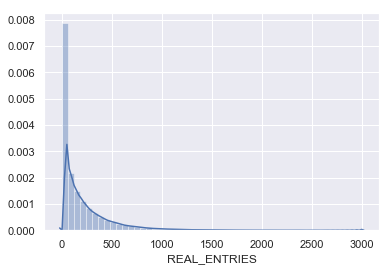

In [57]:
sns.distplot(df['REAL_ENTRIES']
             [df['REAL_ENTRIES'] < 3000]);

In [58]:
# Let's first get the daily entries by station:
stations_daily = \
    (df.groupby(['STATION','DATE'])['REAL_ENTRIES'].sum()
                 .reset_index())  

stations_daily

,STATION,DATE,REAL_ENTRIES
0,1 AV,01/01/2019,8376.0
1,1 AV,01/02/2019,18476.0
2,1 AV,01/03/2019,19866.0
3,1 AV,01/04/2019,20389.0
4,1 AV,01/05/2019,13930.0
5,1 AV,01/06/2019,12021.0
6,1 AV,01/07/2019,19538.0
7,1 AV,01/08/2019,20414.0
8,1 AV,01/09/2019,21066.0
9,1 AV,01/10/2019,21178.0


In [59]:
# To discover the stations with more entries:
stations = \
    (stations_daily.groupby(['STATION'])['REAL_ENTRIES'].sum()
                   .reset_index()
                   .sort_values(by='REAL_ENTRIES',ascending=False))

stations

,STATION,REAL_ENTRIES
70,34 ST-PENN STA,39545099.0
248,GRD CNTRL-42 ST,34360189.0
68,34 ST-HERALD SQ,29751090.0
77,42 ST-PORT AUTH,24779298.0
19,14 ST-UNION SQ,24443560.0
368,TIMES SQ-42 ST,24132970.0
241,FULTON ST,21845914.0
188,CANAL ST,17840178.0
95,59 ST COLUMBUS,17562195.0
94,59 ST,15531820.0


In [60]:
# then get top 15 stations by daily volume 
# (sum across all days is a reasonable way to define this)
top15_stations = \
    (stations_daily.groupby(['STATION'])['REAL_ENTRIES'].sum()
                   .reset_index()
                   .sort_values(by='REAL_ENTRIES',ascending=False) 
                   .STATION.head(15))

top15_stations

70      34 ST-PENN STA
248    GRD CNTRL-42 ST
68     34 ST-HERALD SQ
77     42 ST-PORT AUTH
19      14 ST-UNION SQ
368     TIMES SQ-42 ST
241          FULTON ST
188           CANAL ST
95      59 ST COLUMBUS
94               59 ST
81      47-50 STS ROCK
195        CHAMBERS ST
232      FLUSHING-MAIN
330       PATH NEW WTC
87               50 ST
Name: STATION, dtype: object

In [61]:
# next create a new df that filters the stations daily data down
# to the top 15 stations
stations_daily_top15 = \
    stations_daily[stations_daily['STATION'].isin(top15_stations)]

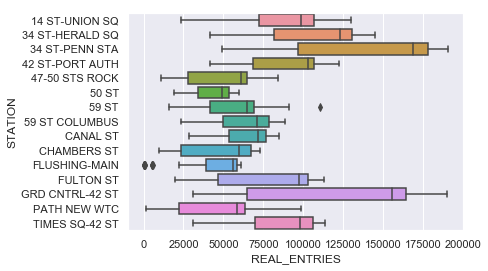

In [62]:
# use seaborn to create a boxplot by station
sns.boxplot('REAL_ENTRIES', 'STATION', data=stations_daily_top15)